In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from keras.datasets import cifar10
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[9]

array([3], dtype=uint8)

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

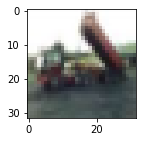

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[2])

In [10]:
y_train = y_train.reshape(-1,)

In [11]:
def sample_plot(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

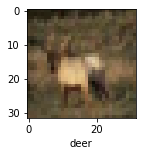

In [12]:
sample_plot(x_train, y_train, 3)

In [13]:
y_train[3]

4

In [14]:
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(2,2))

cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

In [15]:
cnn.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [16]:
cnn.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
6250/6250 [==============================] - 74s 11ms/step - loss: 1.4398 - accuracy: 0.4805
Epoch 2/10
6250/6250 [==============================] - 72s 12ms/step - loss: 1.1068 - accuracy: 0.6087
Epoch 3/10
6250/6250 [==============================] - 73s 12ms/step - loss: 0.9918 - accuracy: 0.6527
Epoch 4/10
6250/6250 [==============================] - 56s 9ms/step - loss: 0.9170 - accuracy: 0.6802
Epoch 5/10
6250/6250 [==============================] - 63s 10ms/step - loss: 0.8585 - accuracy: 0.7006
Epoch 6/10
6250/6250 [==============================] - 61s 10ms/step - loss: 0.8076 - accuracy: 0.7189
Epoch 7/10
6250/6250 [==============================] - 64s 10ms/step - loss: 0.7625 - accuracy: 0.7359
Epoch 8/10
6250/6250 [==============================] - 71s 11ms/step - loss: 0.7228 - accuracy: 0.7470
Epoch 9/10
6250/6250 [==============================] - 67s 11ms/step - loss: 0.6887 - accuracy: 0.7585
Epoch 10/10
6250/6250 [==============================] - 70s 11ms

In [17]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0545 - accuracy: 0.6614


[1.0544589757919312, 0.6614000201225281]

In [18]:
x_test.shape

(10000, 32, 32, 3)

In [19]:
# !pip3 install gast==0.4.0

In [20]:
y_pred = cnn.predict(x_test)

ResourceExhaustedError: Graph execution error:

SameWorkerRecvDone unable to allocate output tensor. Key: /job:localhost/replica:0/task:0/device:CPU:0;db6b4e5d73c666dc;/job:localhost/replica:0/task:0/device:GPU:0;edge_11_IteratorGetNext;0:0
	 [[{{node IteratorGetNext/_2}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_252352]